# **Tame Your Python**

Reference: https://pythonmachinelearning.pro/


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

In [0]:
# Load data
dataset = fetch_olivetti_faces()
 
N, H, W = dataset.images.shape
X = dataset.data
y = dataset.target

In [0]:
print(np.unique(y))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [0]:
print(dataset.images.shape)
print(dataset.data.shape)
print(dataset.target.shape)

(400, 64, 64)
(400, 4096)
(400,)


In [0]:
print(H*W)

4096


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [0]:
from sklearn.decomposition import PCA
n_components = 80
pca = PCA(n_components=n_components, whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [0]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier (hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True)
model.fit(X_train_pca, y_train)

Iteration 1, loss = 3.72262466
Validation score: 0.027778
Iteration 2, loss = 3.26182788
Validation score: 0.222222
Iteration 3, loss = 2.86862178
Validation score: 0.500000
Iteration 4, loss = 2.50159962
Validation score: 0.638889
Iteration 5, loss = 2.15641242
Validation score: 0.722222
Iteration 6, loss = 1.83548483
Validation score: 0.805556
Iteration 7, loss = 1.54526478
Validation score: 0.805556
Iteration 8, loss = 1.28461590
Validation score: 0.833333
Iteration 9, loss = 1.05592135
Validation score: 0.861111
Iteration 10, loss = 0.85758929
Validation score: 0.861111
Iteration 11, loss = 0.69008970
Validation score: 0.861111
Iteration 12, loss = 0.55211437
Validation score: 0.861111
Iteration 13, loss = 0.43983847
Validation score: 0.861111
Iteration 14, loss = 0.34920210
Validation score: 0.888889
Iteration 15, loss = 0.27835666
Validation score: 0.888889
Iteration 16, loss = 0.22367367
Validation score: 0.916667
Iteration 17, loss = 0.18031285
Validation score: 0.916667
Iterat

MLPClassifier(activation='relu', alpha=0.0001, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(1024,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [0]:
y_pred = model.predict(X_test_pca)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           4       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          12       0.33      1.00      0.50         1
          15       1.00      0.50      0.67         4
          16       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         2
          20       0.00      0.00      0.00         0
          21       1.00      1.00      1.00         1
          22       1.00      1.00      1.00         2
          24       1.00      1.00      1.00         2
          26       1.00      1.00      1.00         2
          28       1.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


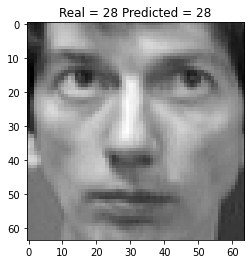

In [0]:
idx = np.random.randint(0,len(y_pred))
plt.figure()
plt.imshow(X_test[idx].reshape((H,W)), cmap = 'gray')
plt.title("Real = " + str(y_test[idx]) + " Predicted = " + str(y_pred[idx]))
plt.show()

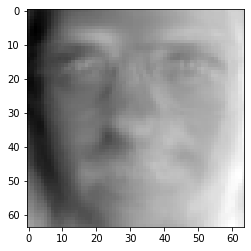

In [0]:
idx = 1
plt.figure()
plt.imshow(pca.components_[idx].reshape((H,W)), cmap = 'gray')
plt.show()

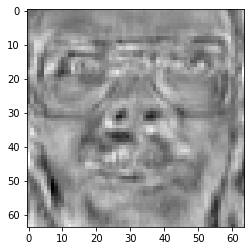

In [0]:
idx = 79
plt.figure()
plt.imshow(pca.components_[idx].reshape((H,W)), cmap = 'gray')
plt.show()